In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE




from sklearn.ensemble import RandomForestClassifier




from sklearn.ensemble import AdaBoostClassifier

In [2]:
# https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [3]:
data = pd.read_csv("heart_2020_cleaned.csv")

In [4]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
data.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

#  Data Cleaning

In [7]:
num_cols = data.select_dtypes(exclude='object').columns
obj_cols = data.select_dtypes(include='object').columns[1:]

In [8]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [9]:
print(f"Unique Values for categorical columns:")
for col in data.select_dtypes(include='object'):
    print(f"  - {col}: {data[col].unique()}\n")

Unique Values for categorical columns:
  - HeartDisease: ['No' 'Yes']

  - Smoking: ['Yes' 'No']

  - AlcoholDrinking: ['No' 'Yes']

  - Stroke: ['No' 'Yes']

  - DiffWalking: ['No' 'Yes']

  - Sex: ['Female' 'Male']

  - AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']

  - Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']

  - Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']

  - PhysicalActivity: ['Yes' 'No']

  - GenHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']

  - Asthma: ['Yes' 'No']

  - KidneyDisease: ['No' 'Yes']

  - SkinCancer: ['Yes' 'No']



## Outliers

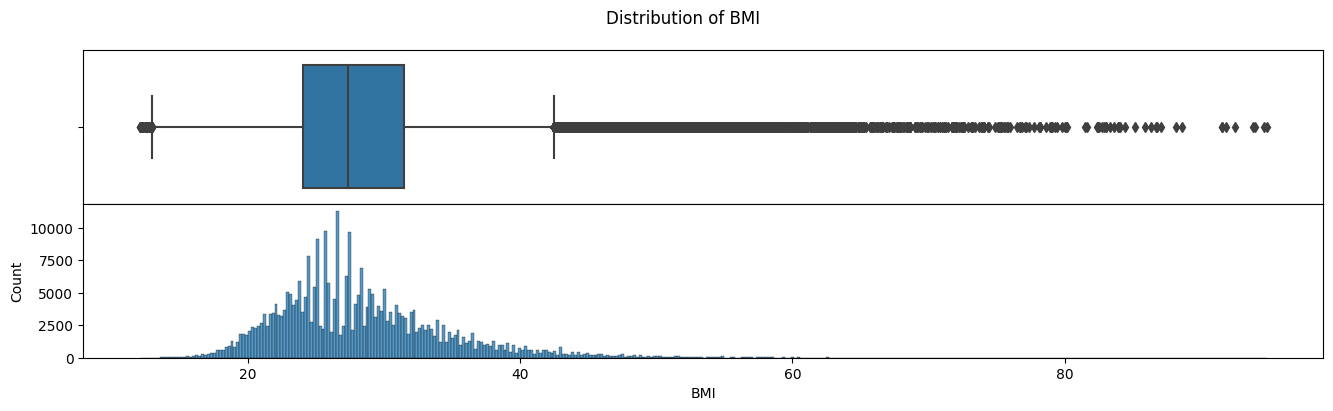

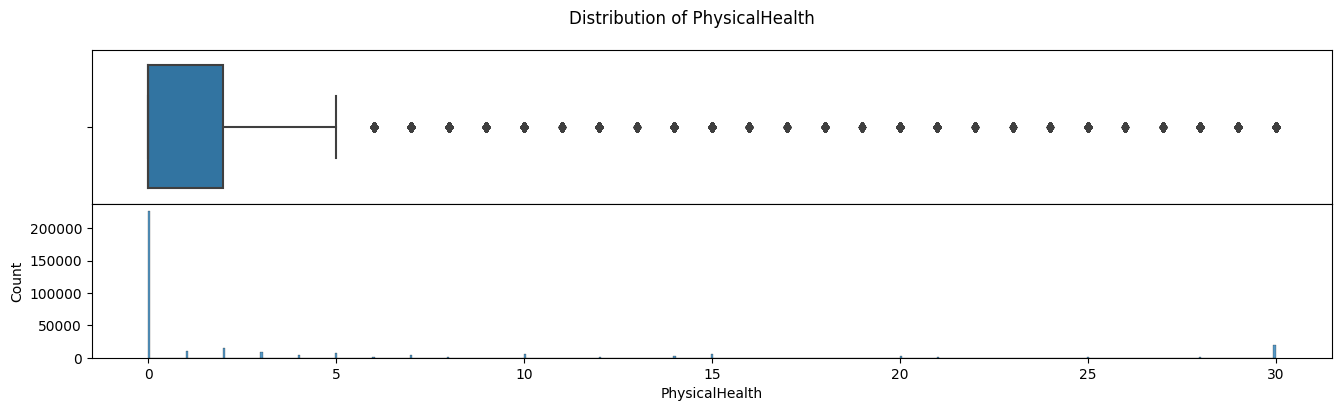

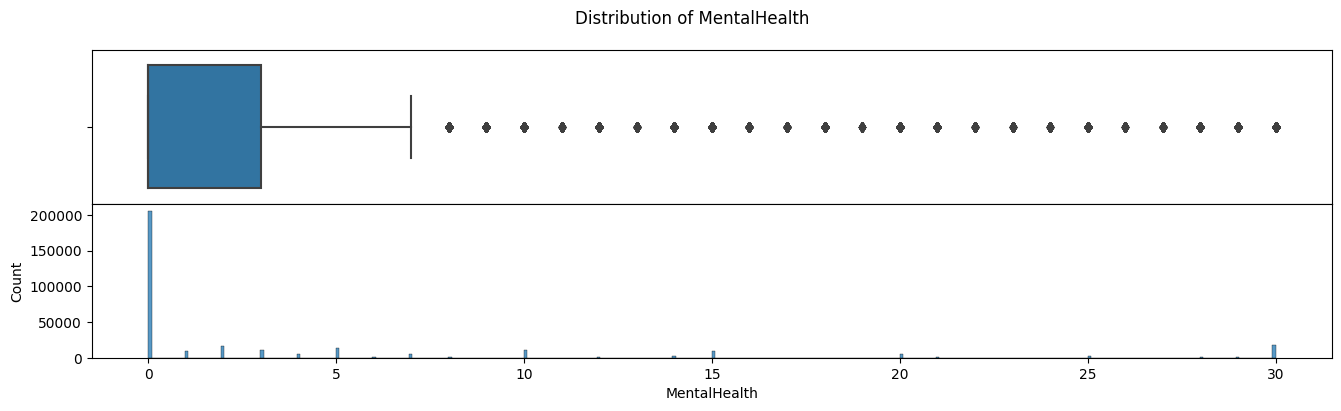

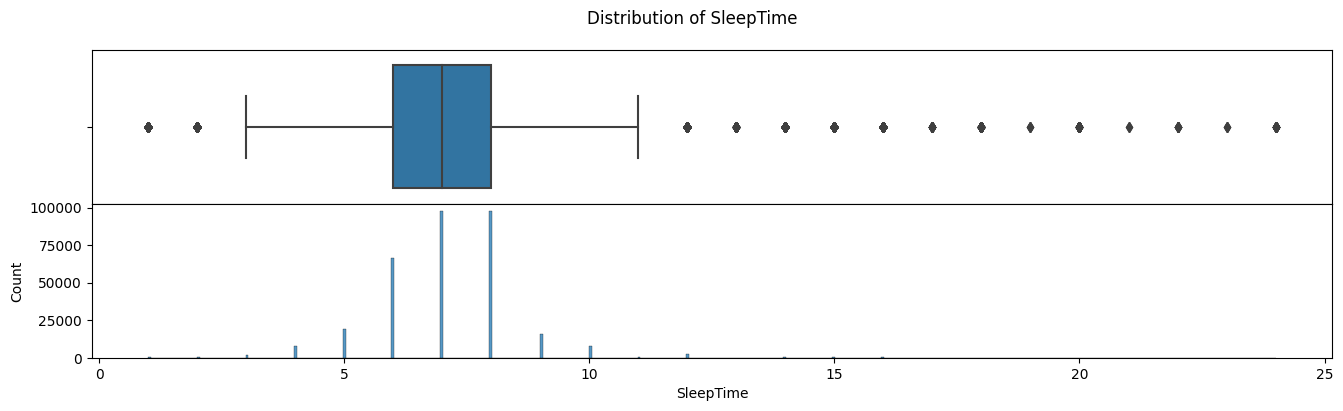

In [10]:
numerical = data.select_dtypes(exclude='object')
n = len(numerical)

for col in numerical:
  fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
  plt.suptitle(f"Distribution of {col}")
  sns.boxplot(data=data, x=col, ax=ax1)
  ax1.set_xlabel(None)
  ax1.get_xaxis().set_ticks([])
  sns.histplot(data=data, x=col, ax=ax2)
  plt.subplots_adjust(hspace=0)
  print("\n")
  plt.show()

In [11]:
for col in numerical:
  Q1, Q3 = data[col].quantile([0.25,0.75])
  IQR = Q3 - Q1
  right = Q3 + 1.5 * IQR
  left = Q1 - 1.5 * IQR
  n = len(data.loc[(data[col] < left) | (data[col] > right)])
  print(f"{col}:\n\tOutlier Num = {n}\n\tOutlier Percentage = {n*100/len(data):.2f}%\n")

BMI:
	Outlier Num = 10396
	Outlier Percentage = 3.25%

PhysicalHealth:
	Outlier Num = 47146
	Outlier Percentage = 14.74%

MentalHealth:
	Outlier Num = 51576
	Outlier Percentage = 16.13%

SleepTime:
	Outlier Num = 4543
	Outlier Percentage = 1.42%



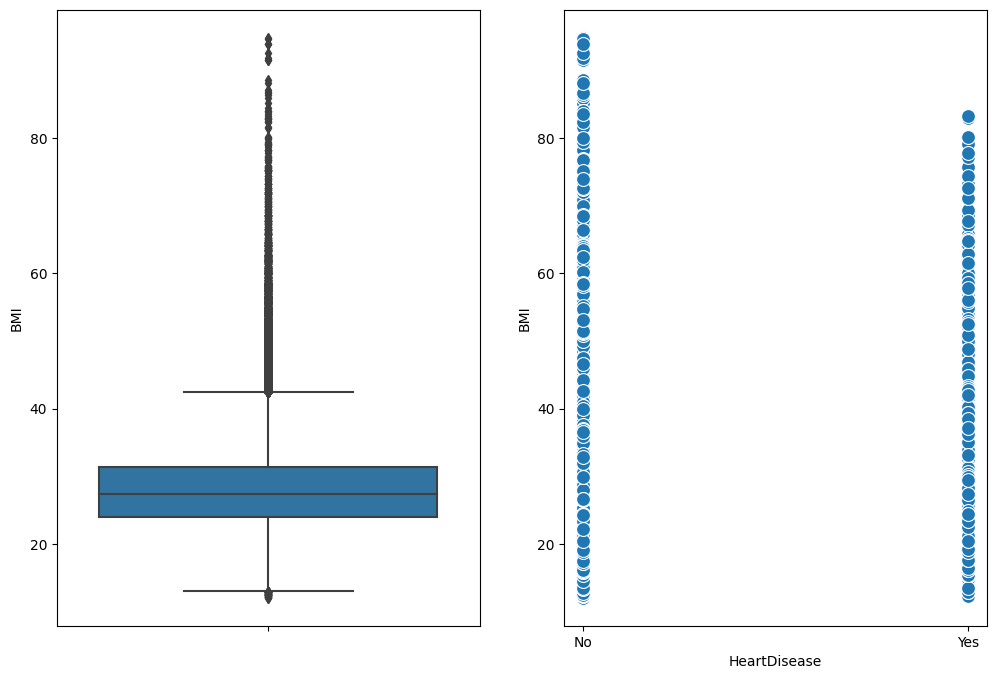

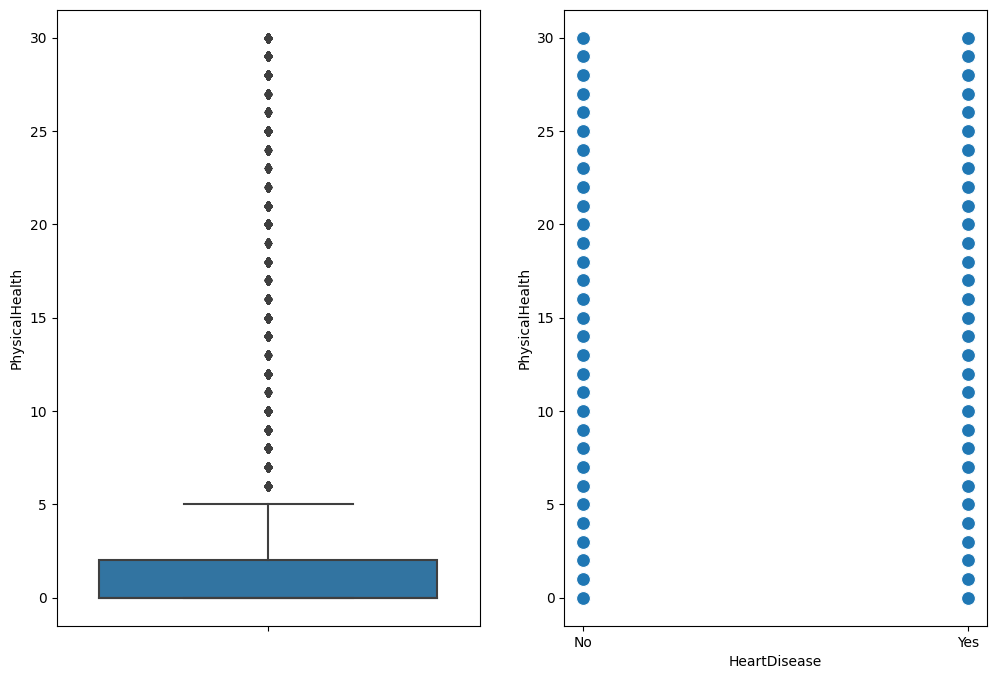

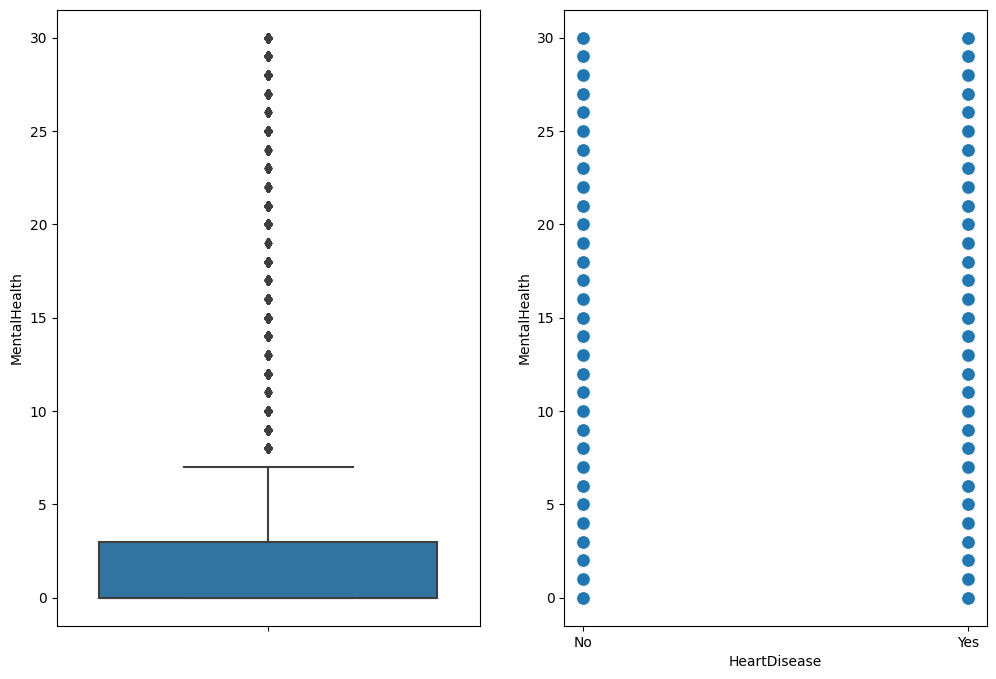

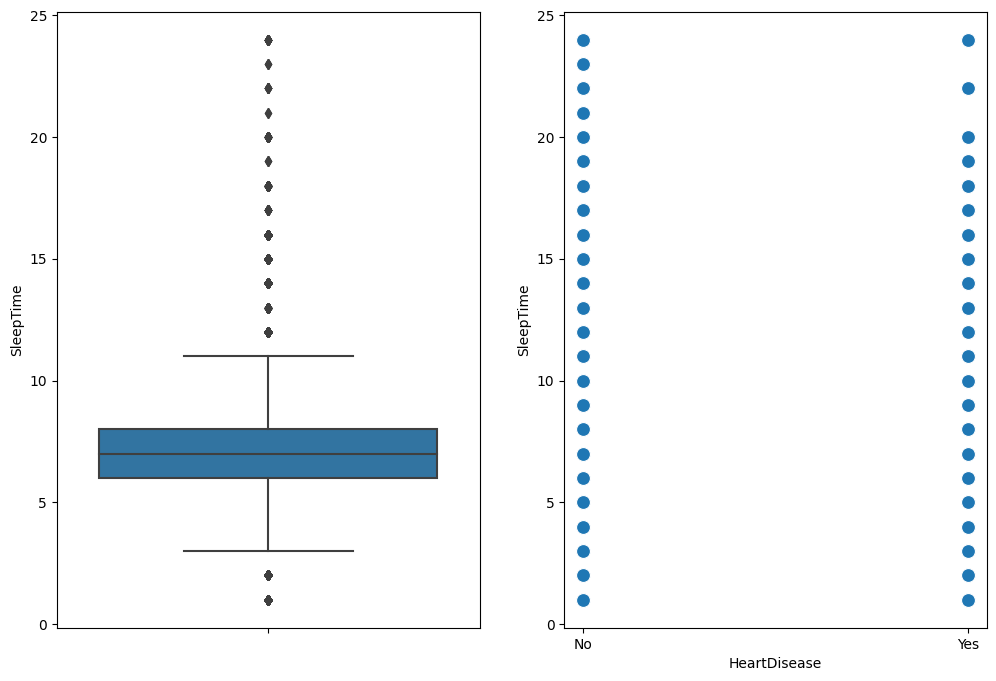

In [12]:
num_cols = data.select_dtypes(exclude='object').columns
for col in num_cols:
    fig, ax =plt.subplots(1,2, figsize=(12,8))
    sns.boxplot(data=data, y=col, ax=ax[0])
    sns.scatterplot(data=data,x = 'HeartDisease', s = 100, y=col, ax=ax[1])
    plt.show()

In [13]:
zs = data.copy()
for col in num_cols:
  zs[col] = zscore(zs[col])
outscores = np.abs(zs[num_cols])
no_outliers = (outscores<=3.3).all(axis=1)
data = data[no_outliers]

In [14]:
label_encoder = LabelEncoder()
categorical_features = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity','Asthma', 'KidneyDisease', 'SkinCancer', 'Sex', 'Race']
for feature in categorical_features:
    print(data[feature].unique())
    data[feature]=label_encoder.fit_transform(data[feature])
    print(data[feature].unique())

data['AgeCategory'] = data['AgeCategory'].replace({'18-24':0, '25-29':1, '30-34':2, '35-39':3, '40-44':4, '45-49':5, '50-54':6, '55-59':7, '60-64':8, '65-69':9, '70-74':10, '75-79':11, '80 or older':12})

data['GenHealth'] = data['GenHealth'].replace({'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4})

data['Diabetic'] = data['Diabetic'].replace({'No':0, 'No, borderline diabetes':1, 'Yes (during pregnancy)':2, 'Yes':3})



['No' 'Yes']
[0 1]
['Yes' 'No']
[1 0]
['No' 'Yes']
[0 1]
['No' 'Yes']
[0 1]
['No' 'Yes']
[0 1]
['Yes' 'No']
[1 0]
['Yes' 'No']
[1 0]
['No' 'Yes']
[0 1]
['Yes' 'No']
[1 0]
['Female' 'Male']
[0 1]
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
[5 2 1 0 4 3]


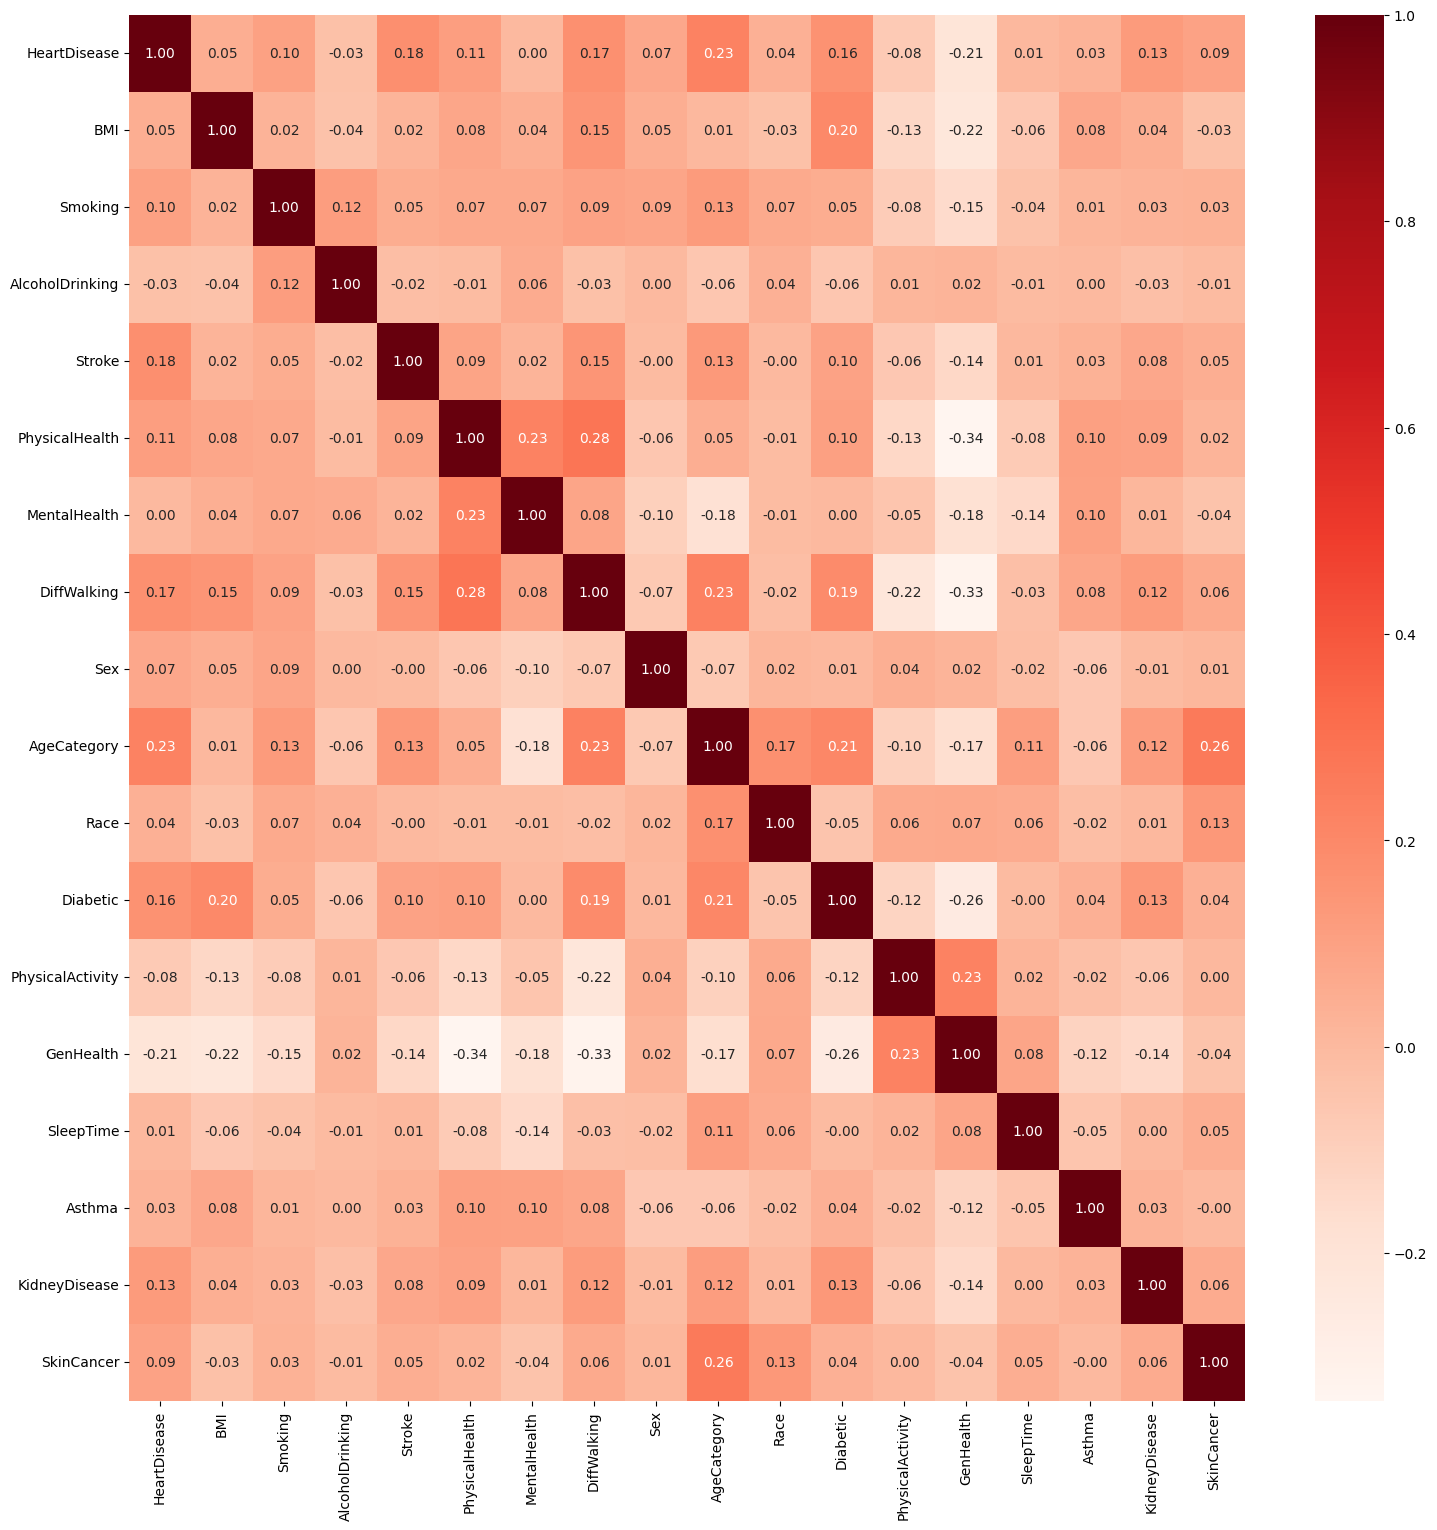

In [15]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

In [16]:
X = data.drop(columns='HeartDisease')
Y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, shuffle=True, random_state = 44)

In [17]:
scaler = MinMaxScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test)

# kNN

## Selecting number of neighbors

In [18]:
def find_k(max_k, scaled_X_train, scaled_X_test,  y_train, y_test):
    error_rate = []
    for i in range(1, max_k):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(scaled_X_train, y_train)
        pred_i = knn.predict(scaled_X_test)
        error_rate.append(np.mean(pred_i != y_test))
    plt.figure(figsize=(15,10))
    plt.plot(range(1, max_k), error_rate, marker='o', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.grid()

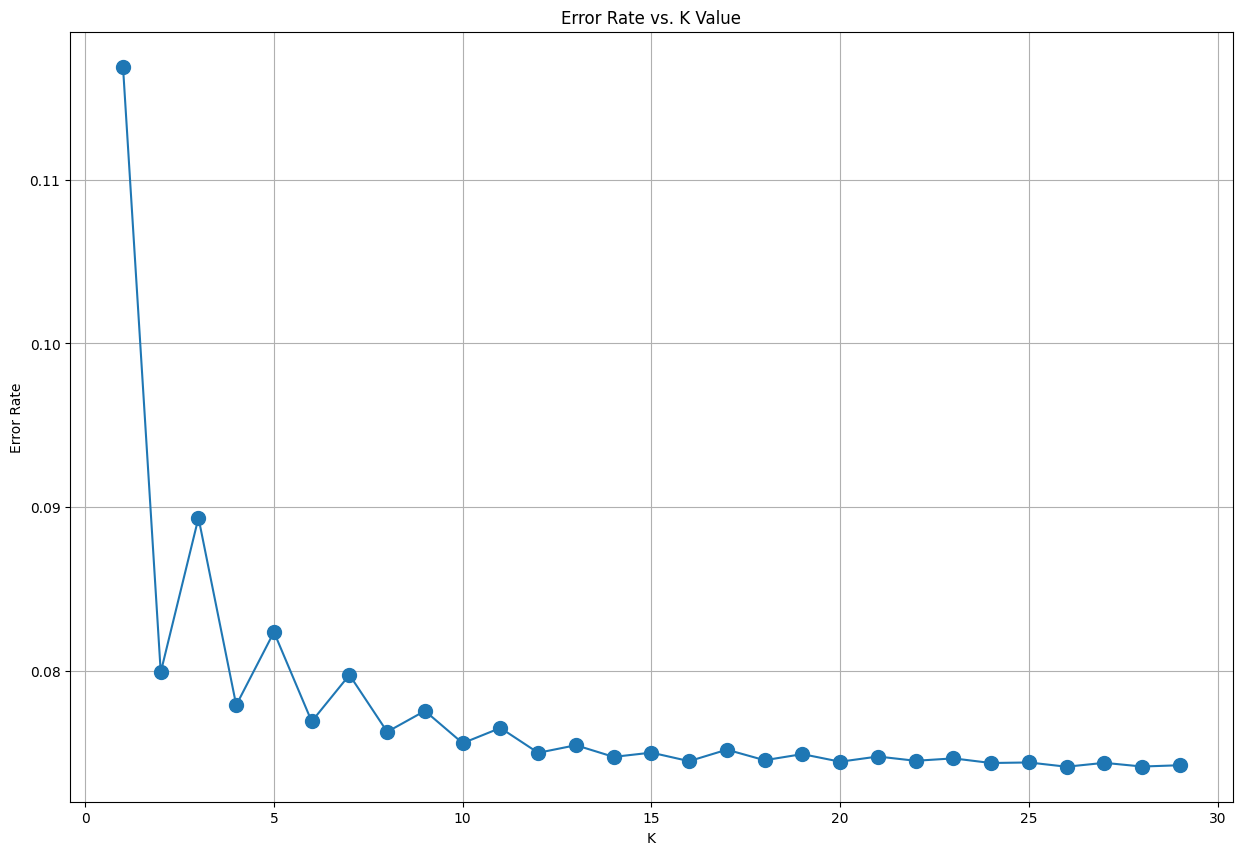

In [19]:
find_k(30, scaled_X_train, scaled_X_test, y_train, y_test)

In [20]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [21]:
pred = knn.predict(scaled_X_test)
print(confusion_matrix(y_test,pred))

[[80691  1059]
 [ 5986   585]]


In [22]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     81750
           1       0.36      0.09      0.14      6571

    accuracy                           0.92     88321
   macro avg       0.64      0.54      0.55     88321
weighted avg       0.89      0.92      0.90     88321



In [23]:
print('Аccuracy:', accuracy_score(y_test,pred))

Аccuracy: 0.9202341458996162


# Decision Tree

In [24]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [25]:
print(confusion_matrix(y_test, y_pred))

[[75916  5834]
 [ 5094  1477]]


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     81750
           1       0.20      0.22      0.21      6571

    accuracy                           0.88     88321
   macro avg       0.57      0.58      0.57     88321
weighted avg       0.88      0.88      0.88     88321



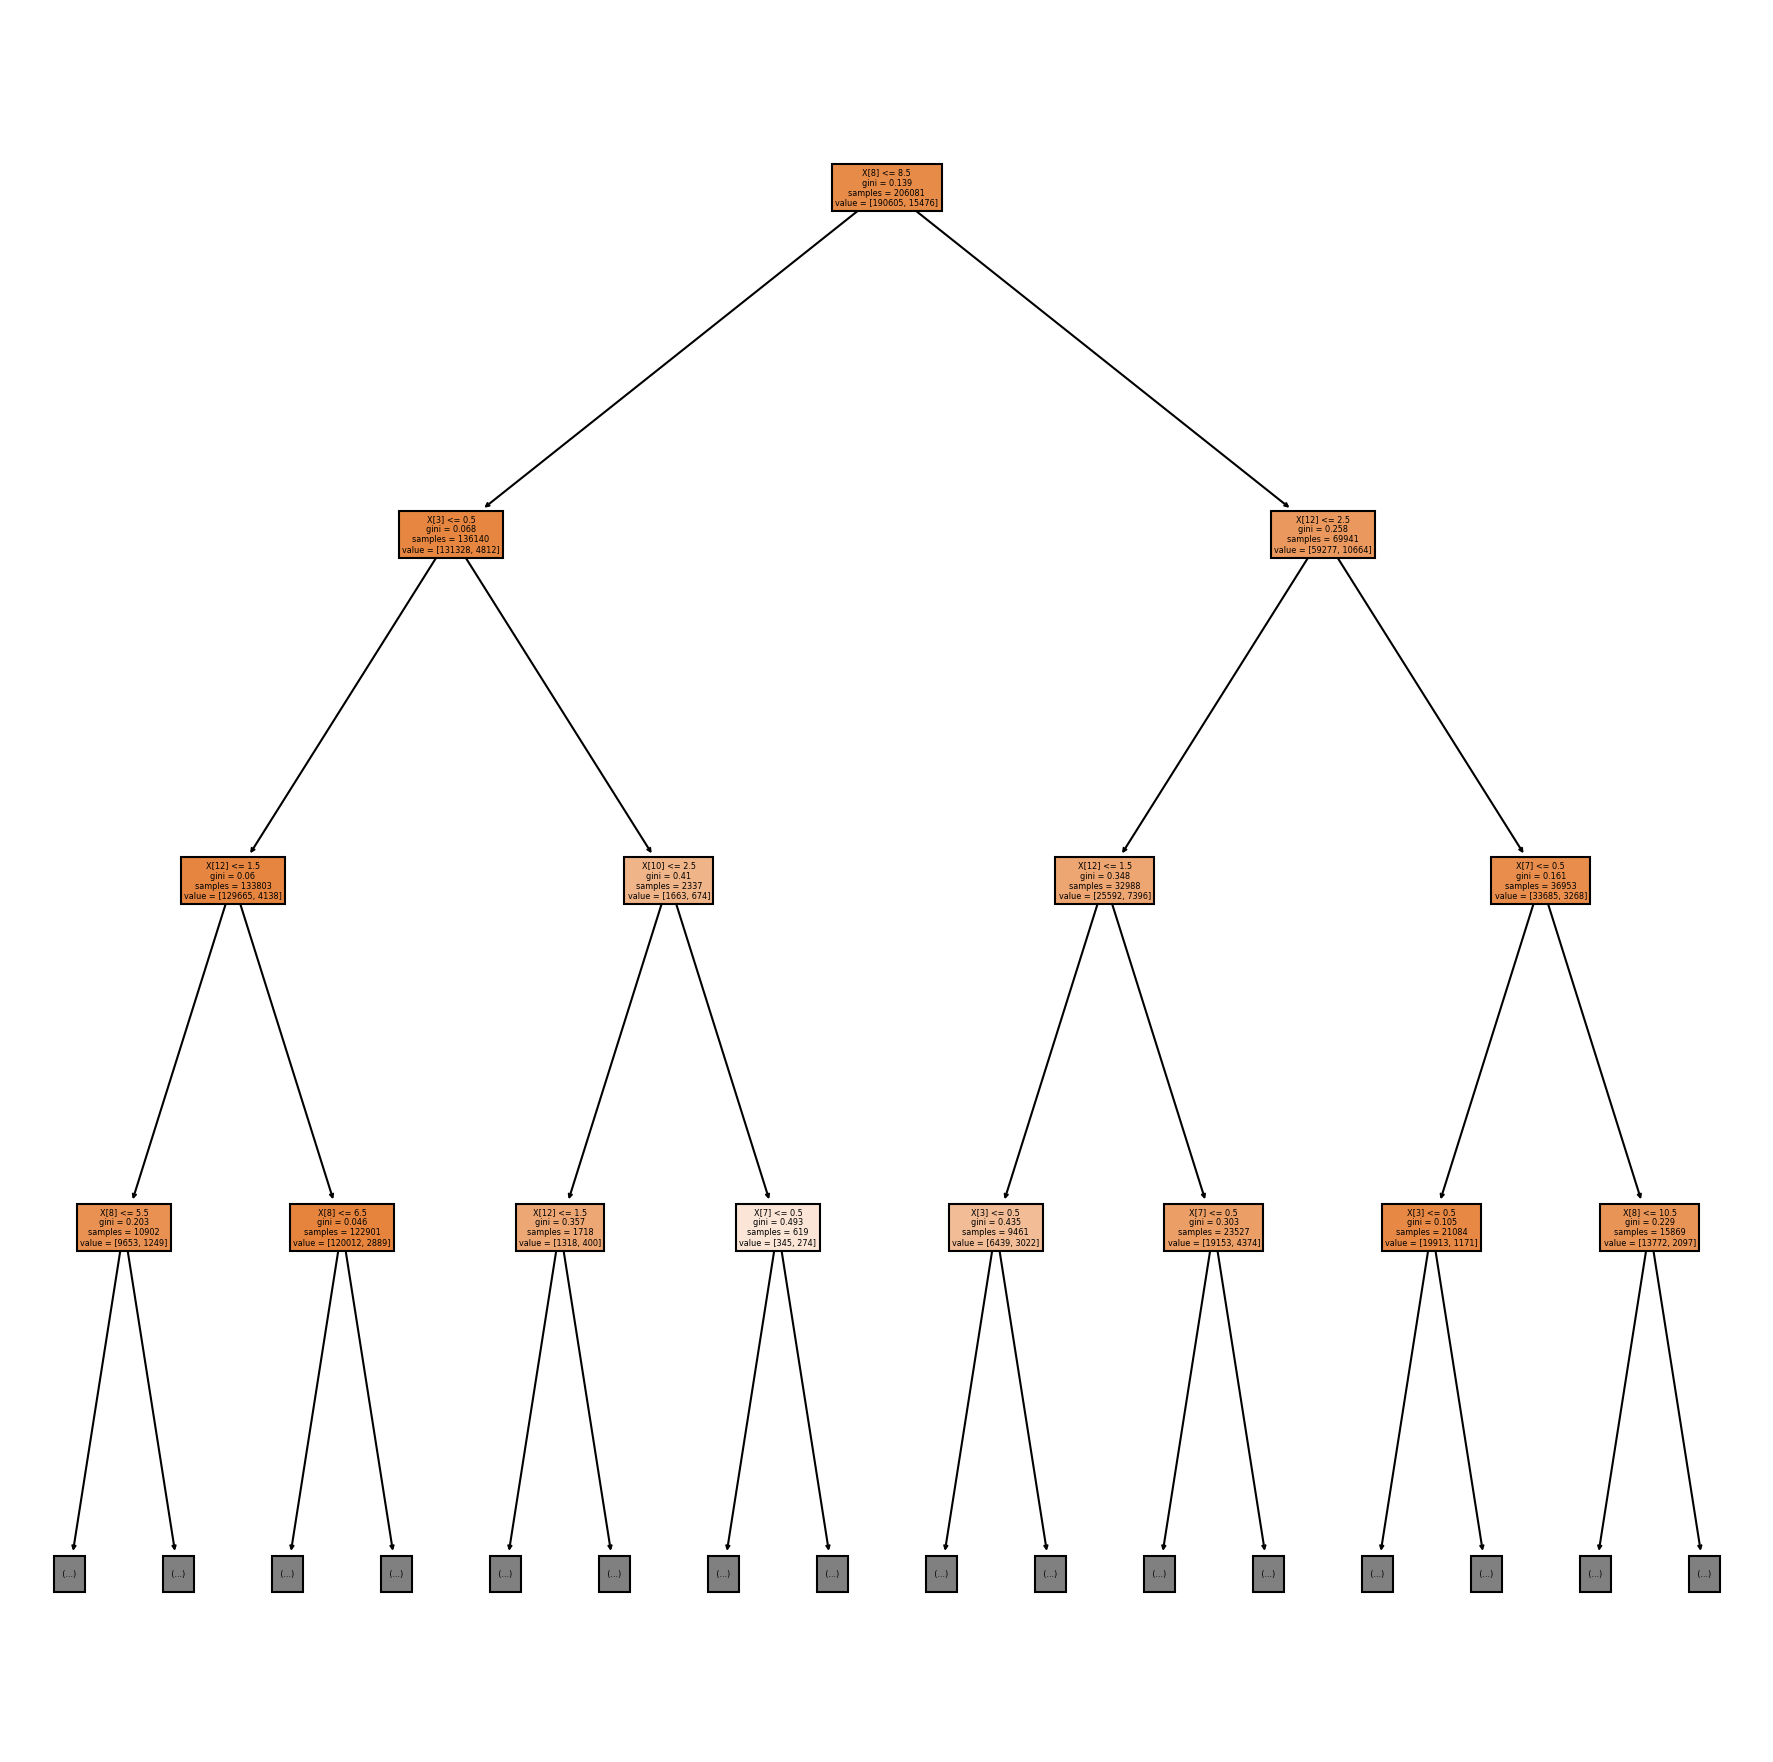

In [27]:
plt.figure(figsize = (15, 15), dpi = 150)
plot_tree(model, filled = True, max_depth = 3)
plt.show()

In [28]:
print('Аccuracy:', accuracy_score(y_test,y_pred))

Аccuracy: 0.8762695168759411


# Random Forest

In [29]:
for i in range (2, 23):
    forest = RandomForestClassifier (criterion='entropy', n_estimators = i)
    forest.fit(X_train, y_train) 
    y_pred = forest.predict(X_test)
    print ('Number of trees: ', i)
    print("Аccuracy: ", accuracy_score(y_test, y_pred))

Number of trees:  2
Аccuracy:  0.9137464476172145
Number of trees:  3
Аccuracy:  0.9011786551329808
Number of trees:  4
Аccuracy:  0.9147201684763533
Number of trees:  5
Аccuracy:  0.90862875193895
Number of trees:  6
Аccuracy:  0.9150938055502089
Number of trees:  7
Аccuracy:  0.9106667723417987
Number of trees:  8
Аccuracy:  0.9157278563422063
Number of trees:  9
Аccuracy:  0.911923551590222
Number of trees:  10
Аccuracy:  0.9164411634832034
Number of trees:  11
Аccuracy:  0.9130218181406461
Number of trees:  12
Аccuracy:  0.9162033944362044
Number of trees:  13
Аccuracy:  0.913169008503074
Number of trees:  14
Аccuracy:  0.9158637243690628
Number of trees:  15
Аccuracy:  0.914471077093783
Number of trees:  16
Аccuracy:  0.9161467827583474
Number of trees:  17
Аccuracy:  0.9142106633756412
Number of trees:  18
Аccuracy:  0.9160901710804905
Number of trees:  19
Аccuracy:  0.9155240543019214
Number of trees:  20
Аccuracy:  0.9167128995369165
Number of trees:  21
Аccuracy:  0.9144823994

In [30]:
forest = RandomForestClassifier (criterion='entropy', n_estimators = 6)
forest.fit(X_train, y_train) 
y_pred = forest.predict(X_test)

In [31]:
print(confusion_matrix(y_test, y_pred))

[[80209  1541]
 [ 5914   657]]


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     81750
           1       0.30      0.10      0.15      6571

    accuracy                           0.92     88321
   macro avg       0.62      0.54      0.55     88321
weighted avg       0.88      0.92      0.90     88321



In [33]:
print("Аccuracy: ", accuracy_score(y_test, y_pred))

Аccuracy:  0.9155919883153497


# SVM

In [ ]:
model = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')

In [ ]:
model.fit(scaled_X_train,y_train)

In [ ]:
y_pred = model.predict(scaled_X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print('Аccuracy:', accuracy_score(y_test,y_pred))

# Gridsearch

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True)

grid.fit(scaled_X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
grid_predictions = grid.predict(scaled_X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print('Аccuracy:', accuracy_score(y_test,grid_predictions))

# AdaBoost

In [ ]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print('Аccuracy:', accuracy_score(y_test,y_pred))